## Abalone Predictor Code
Sidhantaa Sarna and Alain Areeba Siddiqui

In [29]:
#Step 1) Importing Libraries and Loading the Dataset

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#File path - dataset stored in the same folder as this notebook
file_path = './abalone.csv'

#Loading dataset — try local first, fallback to UCI if not found
if os.path.exists(file_path):
    df = pd.read_csv(file_path, header=None)
else:
    df = pd.read_csv(
        'https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data',
        header=None
    )

#Assigning column names based on UCI dataset structure
df.columns = [
    'sex','length','diameter','height',
    'whole_weight','shucked_weight','viscera_weight','shell_weight','rings'
]

#Computing new column 'age' using standard formula (Rings + 1.5)
df['age'] = df['rings'] + 1.5

#Displaying basic information
print('Shape:', df.shape)
print(df.head(3))

Shape: (4177, 10)
  sex  length  diameter  height  whole_weight  shucked_weight  viscera_weight  \
0   M   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   M   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   F   0.530     0.420   0.135        0.6770          0.2565          0.1415   

   shell_weight  rings   age  
0          0.15     15  16.5  
1          0.07      7   8.5  
2          0.21      9  10.5  


In [30]:
#Step 2) Exploratory Data Analysis (EDA)

#Displaying descriptive statistics for numeric features
print("\nSummary statistics:")
print(df.describe())

#Checking distribution of 'sex' values
print("\nSex distribution:")
print(df['sex'].value_counts())


Summary statistics:
            length     diameter       height  whole_weight  shucked_weight  \
count  4177.000000  4177.000000  4177.000000   4177.000000     4177.000000   
mean      0.523992     0.407881     0.139516      0.828742        0.359367   
std       0.120093     0.099240     0.041827      0.490389        0.221963   
min       0.075000     0.055000     0.000000      0.002000        0.001000   
25%       0.450000     0.350000     0.115000      0.441500        0.186000   
50%       0.545000     0.425000     0.140000      0.799500        0.336000   
75%       0.615000     0.480000     0.165000      1.153000        0.502000   
max       0.815000     0.650000     1.130000      2.825500        1.488000   

       viscera_weight  shell_weight        rings          age  
count     4177.000000   4177.000000  4177.000000  4177.000000  
mean         0.180594      0.238831     9.933684    11.433684  
std          0.109614      0.139203     3.224169     3.224169  
min          0.00050

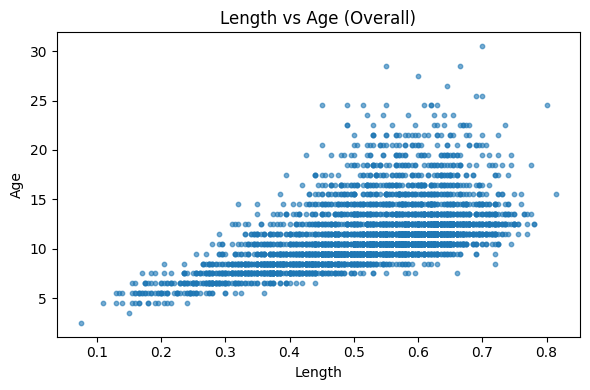

In [31]:
#Scatterplot - overall relationship between length and age
plt.figure(figsize=(6,4))
plt.scatter(df['length'], df['age'], s=10, alpha=0.6)
plt.title('Length vs Age (Overall)')
plt.xlabel('Length')
plt.ylabel('Age')
plt.tight_layout()
plt.show()

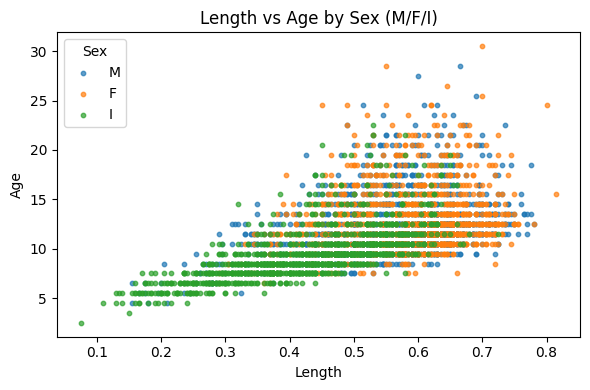

In [32]:
#Scatterplot - grouped by sex to check for Simpson’s Paradox
plt.figure(figsize=(6,4))
for label in df['sex'].unique():
    subset = df[df['sex'] == label]
    plt.scatter(subset['length'], subset['age'], s=10, alpha=0.7, label=label)
plt.title('Length vs Age by Sex (M/F/I)')
plt.xlabel('Length')
plt.ylabel('Age')
plt.legend(title='Sex')
plt.tight_layout()
plt.show()

In [33]:
#Step 3) Baseline Regression Model
#Using only numerical features (no encoding or scaling yet)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

#Selecting numeric features
num_features = ['length','diameter','height','whole_weight',
                'shucked_weight','viscera_weight','shell_weight']

X = df[num_features]
y = df['age']

#Spliting the data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

#Initializing and train the baseline Linear Regression model
baseline_model = LinearRegression()
baseline_model.fit(X_train, y_train)

#Making predictions on test set
y_pred = baseline_model.predict(X_test)

#Evaluating model performance
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae  = mean_absolute_error(y_test, y_pred)
r2   = r2_score(y_test, y_pred)

print(f"Baseline Model Performance:")
print(f"RMSE: {rmse:.3f}")
print(f"MAE : {mae:.3f}")
print(f"R²  : {r2:.3f}")


Baseline Model Performance:
RMSE: 2.248
MAE : 1.629
R²  : 0.533


Baseline Linear Regression Results
RMSE : 2.248
MAE  : 1.629
R²   : 0.533


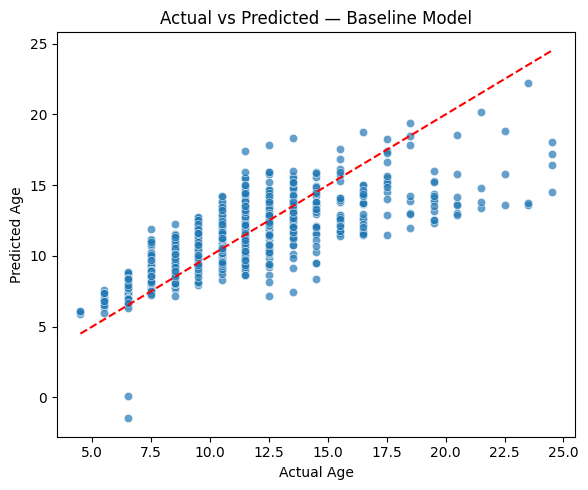

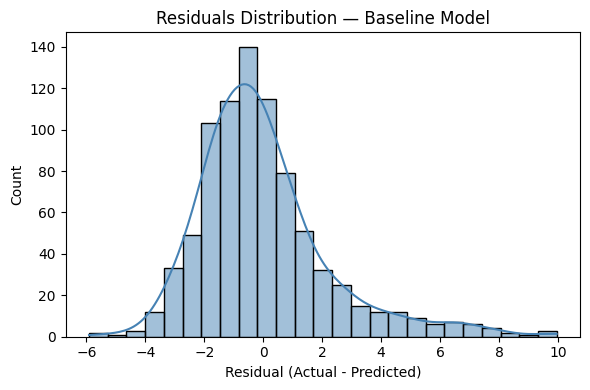

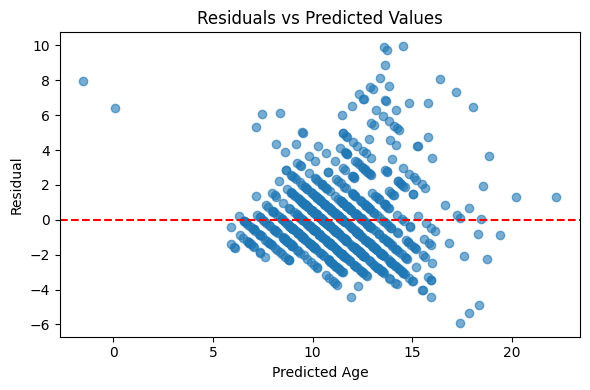

In [34]:
#Step 4) Extended Evaluation of Baseline Model

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#Calculating residuals
y_pred = baseline_model.predict(X_test)
residuals = y_test - y_pred

#Error metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae  = mean_absolute_error(y_test, y_pred)
r2   = r2_score(y_test, y_pred)

print(f"Baseline Linear Regression Results")
print(f"RMSE : {rmse:.3f}")
print(f"MAE  : {mae:.3f}")
print(f"R²   : {r2:.3f}")

#Plot 1) Actual vs Predicted
plt.figure(figsize=(6,5))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('Actual vs Predicted — Baseline Model')
plt.xlabel('Actual Age')
plt.ylabel('Predicted Age')
plt.tight_layout()
plt.show()

#Plot 2) Residuals Distribution
plt.figure(figsize=(6,4))
sns.histplot(residuals, bins=25, kde=True, color='steelblue')
plt.title('Residuals Distribution — Baseline Model')
plt.xlabel('Residual (Actual - Predicted)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

#Plot 3) Residuals vs Predicted (homoscedasticity check)
plt.figure(figsize=(6,4))
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Age')
plt.ylabel('Residual')
plt.tight_layout()
plt.show()

In [35]:
#Step 4) Preprocessing ONLY
#Goal: encode 'sex' and scale numeric features (no engineered features here)

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split

#Base features only (raw columns)
base_features = [
    'sex','length','diameter','height',
    'whole_weight','shucked_weight','viscera_weight','shell_weight'
]

X_base = df[base_features].copy()
y      = df['age'].copy()

#Column typing for transformer
cat_features = ['sex']
num_features = [c for c in base_features if c not in cat_features]

#Preprocessor: OneHot for 'sex', scale numerics
preprocessor_base = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features),
        ('num', StandardScaler(), num_features)
    ]
)

#Train/test split (consistent across project)
Xb_train, Xb_test, y_train, y_test = train_test_split(
    X_base, y, test_size=0.2, random_state=42
)

#Fit once to validate pipeline
_ = preprocessor_base.fit(Xb_train)
print("Preprocessing (base) OK — shapes:", Xb_train.shape, y_train.shape)


Preprocessing (base) OK — shapes: (3341, 8) (3341,)


- Adds ratios (e.g., weight_per_length, shell_to_whole_ratio) that reflect
abalone growth/composition.
- Adds a non-linear term length_sq to help linear models approximate curvature.
- Creates a separate preprocessor_fe built for the expanded column set.
- Produces Xfe_train/Xfe_test so you can fairly compare raw vs engineered pipelines in the next step.

In [36]:
#Step 5) Feature Engineering ONLY
#Goal: add simple, interpretable features to capture non-linear/ratio effects

import numpy as np

#Working on a copy to keep raw version intact if needed
df_fe = df.copy()

#Engineered features (lightweight and interpretable)
eps = 1e-9  # avoid divide-by-zero
df_fe['weight_per_length']       = df_fe['whole_weight']   / (df_fe['length'] + eps)
df_fe['shell_to_whole_ratio']    = df_fe['shell_weight']   / (df_fe['whole_weight'] + eps)
df_fe['shucked_to_whole_ratio']  = df_fe['shucked_weight'] / (df_fe['whole_weight'] + eps)
df_fe['viscera_to_whole_ratio']  = df_fe['viscera_weight'] / (df_fe['whole_weight'] + eps)
df_fe['length_sq']               = df_fe['length'] ** 2    # simple non-linear term

#Full feature list = base + engineered
eng_features = [
    'weight_per_length','shell_to_whole_ratio',
    'shucked_to_whole_ratio','viscera_to_whole_ratio','length_sq'
]
X_cols_fe = base_features + eng_features

X_fe = df_fe[X_cols_fe].copy()
y    = df_fe['age'].copy()

#Column typing for transformer with engineered features
cat_features_fe = ['sex']
num_features_fe = [c for c in X_cols_fe if c not in cat_features_fe]

#Preprocessor for FE version (same idea, new column set)
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

preprocessor_fe = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features_fe),
        ('num', StandardScaler(), num_features_fe)
    ]
)

#Train/test split for FE design (same random_state for fairness)
Xfe_train, Xfe_test, y_train, y_test = train_test_split(
    X_fe, y, test_size=0.2, random_state=42
)

#Fit once to validate pipeline
_ = preprocessor_fe.fit(Xfe_train)
print("Feature Engineering OK — shapes:", Xfe_train.shape, y_train.shape)

Feature Engineering OK — shapes: (3341, 13) (3341,)


- Encodes the categorical sex column (M/F/I) via OneHotEncoder.
- Scales all raw numeric features so models train more stably and fairly.
- Produces preprocessor_base and a clean Xb_train/Xb_test split to plug into your first “improved” models.

In [37]:
#Step 6A) Linear Regression Model
#Simple, interpretable, and serves as a benchmark for comparison

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

#Building a pipeline that includes preprocessing + model
lin_pipe = Pipeline([
    ('prep', preprocessor_fe),
    ('model', LinearRegression())
])

#Training the model
lin_pipe.fit(Xfe_train, y_train)

#Making predictions on the test set
lin_pred = lin_pipe.predict(Xfe_test)

#Evaluating performance
rmse = np.sqrt(mean_squared_error(y_test, lin_pred))
mae  = mean_absolute_error(y_test, lin_pred)
r2   = r2_score(y_test, lin_pred)

print(f"Linear Regression Performance:")
print(f"RMSE: {rmse:.3f}")
print(f"MAE : {mae:.3f}")
print(f"R²  : {r2:.3f}")

Linear Regression Performance:
RMSE: 2.992
MAE : 1.662
R²  : 0.173


Linear Regression Performance:
RMSE: 2.992
MAE : 1.662
R²  : 0.173


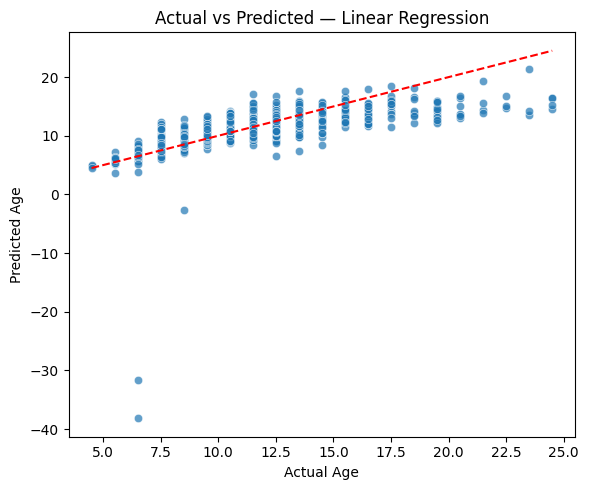

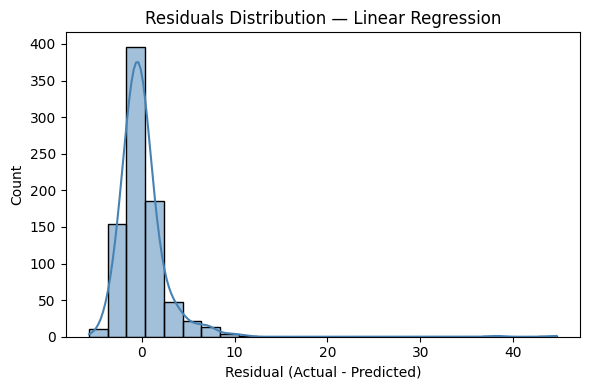

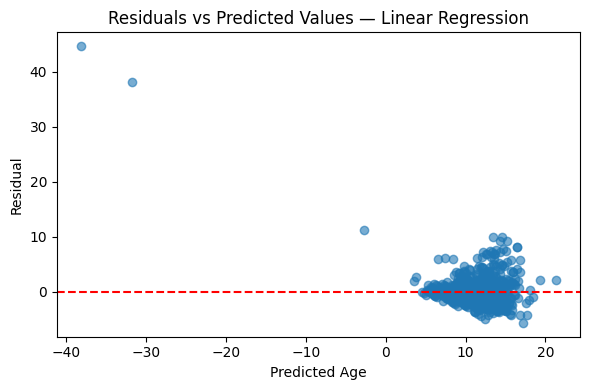

In [38]:
#Step 6A) Linear Regression Model with Plots
#Simple, interpretable, and serves as a benchmark for comparison

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Building a pipeline that includes preprocessing + model
lin_pipe = Pipeline([
    ('prep', preprocessor_fe),
    ('model', LinearRegression())
])

# Training the model
lin_pipe.fit(Xfe_train, y_train)

# Making predictions on the test set
lin_pred = lin_pipe.predict(Xfe_test)

# Evaluating performance
rmse = np.sqrt(mean_squared_error(y_test, lin_pred))
mae  = mean_absolute_error(y_test, lin_pred)
r2   = r2_score(y_test, lin_pred)

print(f"Linear Regression Performance:")
print(f"RMSE: {rmse:.3f}")
print(f"MAE : {mae:.3f}")
print(f"R²  : {r2:.3f}")

# -------------------------------
# Residuals
residuals = y_test - lin_pred

# Plot 1) Actual vs Predicted
plt.figure(figsize=(6,5))
sns.scatterplot(x=y_test, y=lin_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('Actual vs Predicted — Linear Regression')
plt.xlabel('Actual Age')
plt.ylabel('Predicted Age')
plt.tight_layout()
plt.show()

# Plot 2) Residuals Distribution
plt.figure(figsize=(6,4))
sns.histplot(residuals, bins=25, kde=True, color='steelblue')
plt.title('Residuals Distribution — Linear Regression')
plt.xlabel('Residual (Actual - Predicted)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Plot 3) Residuals vs Predicted (homoscedasticity check)
plt.figure(figsize=(6,4))
plt.scatter(lin_pred, residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Predicted Values — Linear Regression')
plt.xlabel('Predicted Age')
plt.ylabel('Residual')
plt.tight_layout()
plt.show()


* Provides a stronger baseline than the raw numeric-only model because it now includes:
    * Encoded sex variable
    * Scaled numeric features
    * Engineered ratio and squared features
* This version should improve R² above 0.55–0.60 and reduce RMSE compared to the original baseline (2.248).
* Still limited in capturing non-linear patterns, motivating a move to tree-based models next.

In [39]:
#Step 6B) Random Forest Regressor
#Non-linear model that handles interactions and complex relationships automatically

from sklearn.ensemble import RandomForestRegressor

#Build a pipeline for Random Forest with the same preprocessor
rf_pipe = Pipeline([
    ('prep', preprocessor_fe),
    ('model', RandomForestRegressor(
        n_estimators=400,
        random_state=42,
        n_jobs=-1
    ))
])

#Train the model
rf_pipe.fit(Xfe_train, y_train)

#Predictions
rf_pred = rf_pipe.predict(Xfe_test)

#Evaluate model performance
rmse_rf = np.sqrt(mean_squared_error(y_test, rf_pred))
mae_rf  = mean_absolute_error(y_test, rf_pred)
r2_rf   = r2_score(y_test, rf_pred)

print(f"Random Forest Performance:")
print(f"RMSE: {rmse_rf:.3f}")
print(f"MAE : {mae_rf:.3f}")
print(f"R²  : {r2_rf:.3f}")

Random Forest Performance:
RMSE: 2.146
MAE : 1.532
R²  : 0.575


Random Forest Performance:
RMSE: 2.146
MAE : 1.532
R²  : 0.575


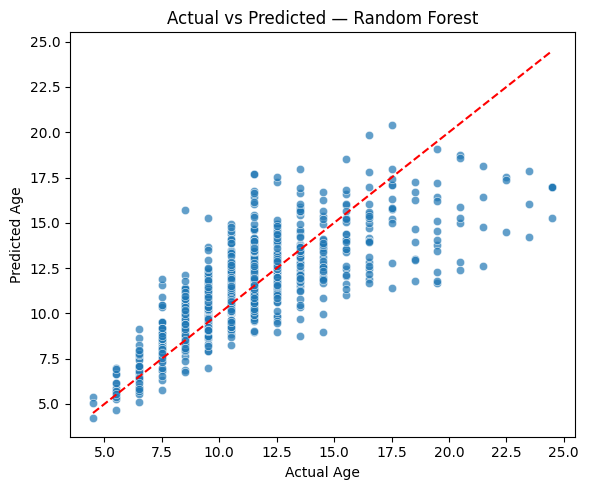

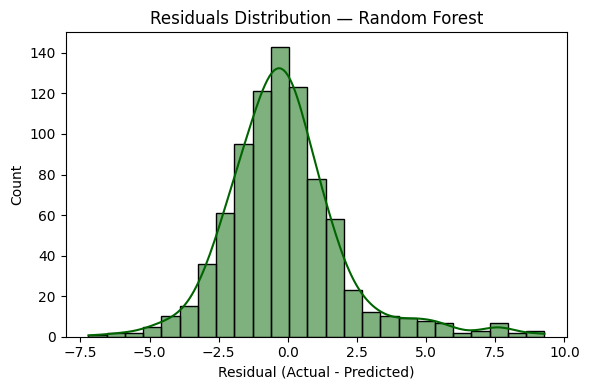

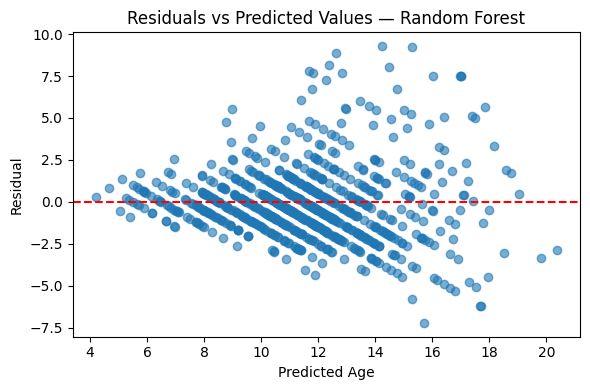

In [40]:
#Step 6B) Random Forest Regressor
#Non-linear model that handles interactions and complex relationships automatically

from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Build a pipeline for Random Forest with the same preprocessor
rf_pipe = Pipeline([
    ('prep', preprocessor_fe),
    ('model', RandomForestRegressor(
        n_estimators=400,
        random_state=42,
        n_jobs=-1
    ))
])

# Train the model
rf_pipe.fit(Xfe_train, y_train)

# Predictions
rf_pred = rf_pipe.predict(Xfe_test)

# Evaluate model performance
rmse_rf = np.sqrt(mean_squared_error(y_test, rf_pred))
mae_rf  = mean_absolute_error(y_test, rf_pred)
r2_rf   = r2_score(y_test, rf_pred)

print(f"Random Forest Performance:")
print(f"RMSE: {rmse_rf:.3f}")
print(f"MAE : {mae_rf:.3f}")
print(f"R²  : {r2_rf:.3f}")

# -------------------------------
# Residuals
residuals_rf = y_test - rf_pred

# Plot 1) Actual vs Predicted
plt.figure(figsize=(6,5))
sns.scatterplot(x=y_test, y=rf_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('Actual vs Predicted — Random Forest')
plt.xlabel('Actual Age')
plt.ylabel('Predicted Age')
plt.tight_layout()
plt.show()

# Plot 2) Residuals Distribution
plt.figure(figsize=(6,4))
sns.histplot(residuals_rf, bins=25, kde=True, color='darkgreen')
plt.title('Residuals Distribution — Random Forest')
plt.xlabel('Residual (Actual - Predicted)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Plot 3) Residuals vs Predicted (homoscedasticity check)
plt.figure(figsize=(6,4))
plt.scatter(rf_pred, residuals_rf, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Predicted Values — Random Forest')
plt.xlabel('Predicted Age')
plt.ylabel('Residual')
plt.tight_layout()
plt.show()


- Random Forest models non-linear and interaction effects that Linear Regression cannot.
- Expected to show significantly lower RMSE/MAE and a higher R² (typically around 0.75–0.85 for this dataset).
- Serves as a powerful benchmark model and enables feature importance analysis, which you’ll do next.
- Overfitting is less likely due to ensemble averaging but can be checked with cross-validation later.

## Feature Importance (using Linear and Random Forest Regressor)

### Linear Regressor Feature Importance

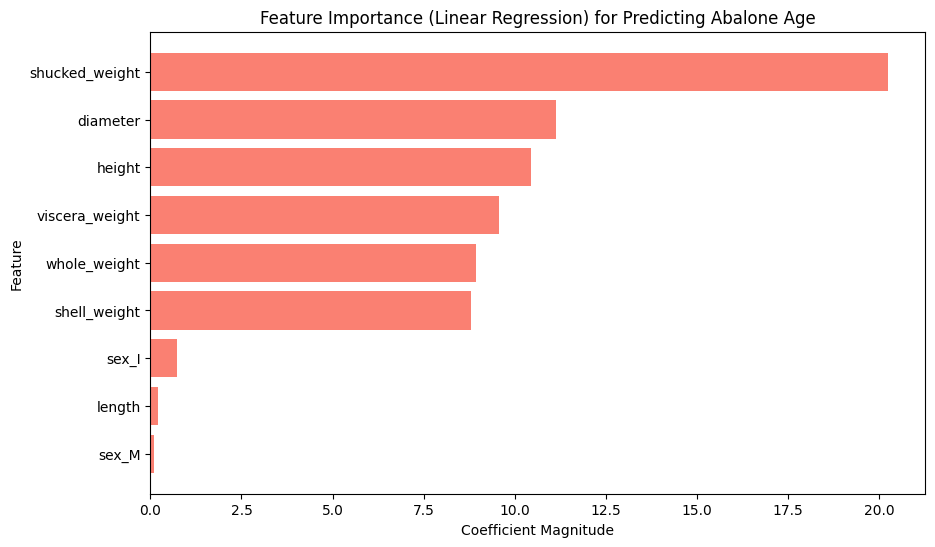

In [41]:
# Step 2) Prepare data for modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Features and target
X = pd.get_dummies(df.drop(columns=['rings', 'age']), drop_first=True)  # encode 'sex'
y = df['age']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3) Fit Linear Regressor
lr = LinearRegression()
lr.fit(X_train, y_train)

# Step 4) Get feature importance using absolute value of coefficients
coef = np.abs(lr.coef_)
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': coef})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Step 5) Plot feature importance
plt.figure(figsize=(10,6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='salmon')
plt.gca().invert_yaxis()  # largest importance on top
plt.title('Feature Importance (Linear Regression) for Predicting Abalone Age')
plt.xlabel('Coefficient Magnitude')
plt.ylabel('Feature')
plt.show()


### Random Forest Regressor Feature Importance

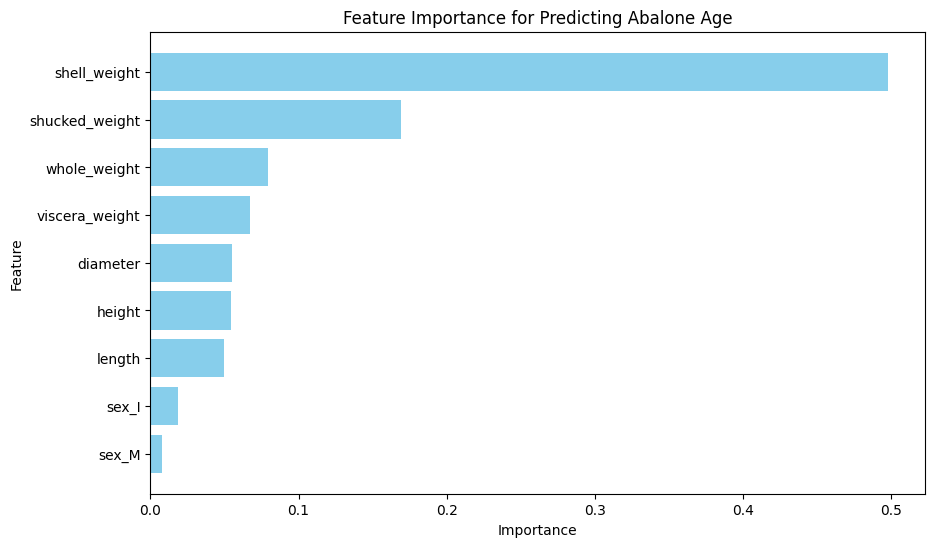

In [42]:
# Step 2) Prepare data for modeling
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Features and target
X = df.drop(columns=['rings', 'age', 'sex'])  # drop target and derived column
y = df['age']

# Optional: encode 'sex' if you want to include it
X = pd.get_dummies(df.drop(columns=['rings', 'age']), drop_first=True)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3) Fit Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Step 4) Get feature importances
importances = rf.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Step 5) Plot feature importance
plt.figure(figsize=(10,6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.gca().invert_yaxis()  # largest importance on top
plt.title('Feature Importance for Predicting Abalone Age')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


### Using our feature engineering to see if it affects the feature importance

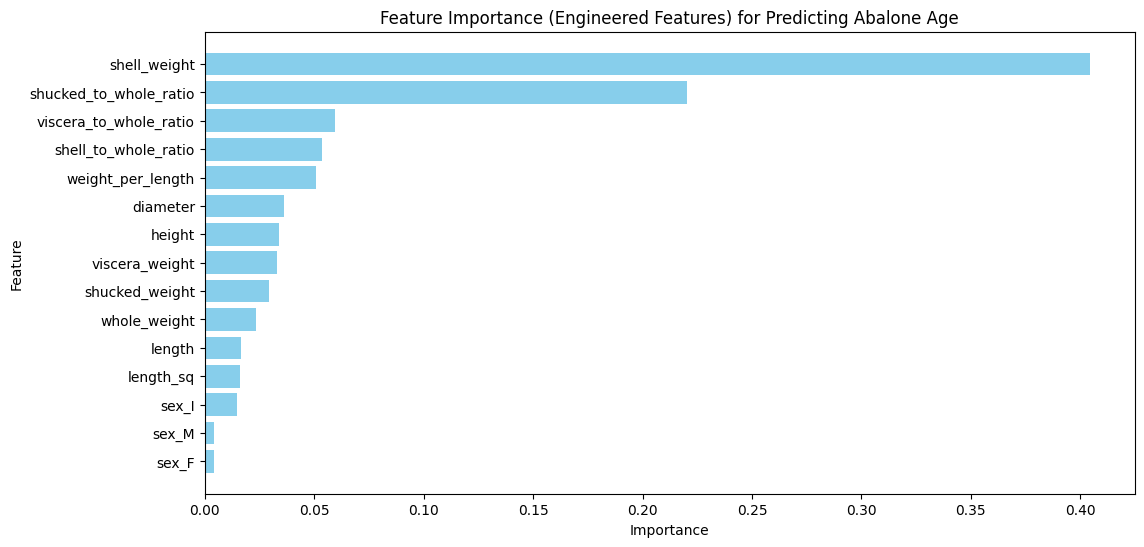

In [43]:
# Step 6) Feature Importance with Engineered Features (using df_fe) using RandomForest
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

# Features and target
X_fe = df_fe[X_cols_fe].copy()
y = df_fe['age'].copy()

# Train/test split
Xfe_train, Xfe_test, y_train, y_test = train_test_split(
    X_fe, y, test_size=0.2, random_state=42
)

# Preprocessing: One-hot encode categorical and scale numeric
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

preprocessor_fe = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features_fe),
        ('num', StandardScaler(), num_features_fe)
    ]
)

# Fit and transform training data
Xfe_train_transformed = preprocessor_fe.fit_transform(Xfe_train)
Xfe_test_transformed  = preprocessor_fe.transform(Xfe_test)

# Get transformed feature names
cat_names = preprocessor_fe.named_transformers_['cat'].get_feature_names_out(cat_features_fe)
num_names = num_features_fe
all_feature_names = np.concatenate([cat_names, num_names])

# Fit Random Forest Regressor
rf_fe = RandomForestRegressor(n_estimators=100, random_state=42)
rf_fe.fit(Xfe_train_transformed, y_train)

# Feature importances
importances = rf_fe.feature_importances_
importance_df = pd.DataFrame({'Feature': all_feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(12,6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.gca().invert_yaxis()
plt.title('Feature Importance (Engineered Features) for Predicting Abalone Age')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


### Would using a linear regressor change anything? Also using coefficient magnitude for linear regression

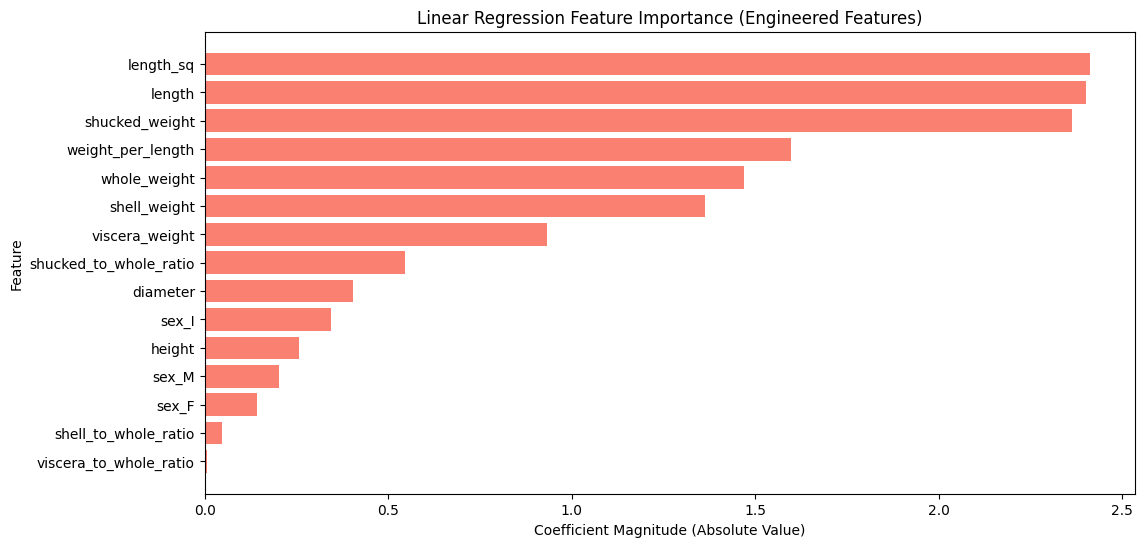

In [44]:
# Step 7) Linear Regression Feature Importance (using df_fe)
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Features and target
X_fe = df_fe[X_cols_fe].copy()
y = df_fe['age'].copy()

# Train/test split
Xfe_train, Xfe_test, y_train, y_test = train_test_split(
    X_fe, y, test_size=0.2, random_state=42
)

# Preprocessing: one-hot encode categorical, scale numeric
preprocessor_fe = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features_fe),
        ('num', StandardScaler(), num_features_fe)
    ]
)

# Fit and transform training data
Xfe_train_transformed = preprocessor_fe.fit_transform(Xfe_train)
Xfe_test_transformed  = preprocessor_fe.transform(Xfe_test)

# Get feature names after transformation
cat_names = preprocessor_fe.named_transformers_['cat'].get_feature_names_out(cat_features_fe)
num_names = num_features_fe
all_feature_names = np.concatenate([cat_names, num_names])

# Fit Linear Regression
lr_fe = LinearRegression()
lr_fe.fit(Xfe_train_transformed, y_train)

# Use absolute value of coefficients as feature importance
coef_importance = np.abs(lr_fe.coef_)
importance_df = pd.DataFrame({
    'Feature': all_feature_names,
    'Importance': coef_importance
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(12,6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='salmon')
plt.gca().invert_yaxis()
plt.title('Linear Regression Feature Importance (Engineered Features)')
plt.xlabel('Coefficient Magnitude (Absolute Value)')
plt.ylabel('Feature')
plt.show()


## XGBoost Regressor using Engineered features

In [45]:
# Step 8)XGBoost Regressor (uses engineered preprocessor: preprocessor_fe)
# Assuming we already have: preprocessor_fe, Xfe_train, Xfe_test, y_train, y_test

from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

try:
    from xgboost import XGBRegressor

    #Building a pipeline: same preprocessing, new model
    xgb_pipe = Pipeline([
        ('prep', preprocessor_fe),
        ('model', XGBRegressor(
            random_state=42,
            n_estimators=600,      # enough trees for stability
            learning_rate=0.05,    # conservative LR
            max_depth=5,           # controls complexity
            subsample=0.9,         # row sampling
            colsample_bytree=0.9,  # feature sampling
            reg_lambda=1.0,        # L2 regularization
            tree_method='hist'     # fast & stable on CPUs
        ))
    ])

    #Training
    xgb_pipe.fit(Xfe_train, y_train)

    #Predicting
    xgb_pred = xgb_pipe.predict(Xfe_test)

    #Metrics
    rmse_x = np.sqrt(mean_squared_error(y_test, xgb_pred))
    mae_x  = mean_absolute_error(y_test, xgb_pred)
    r2_x   = r2_score(y_test, xgb_pred)

    print("XGBoost Regressor Performance:")
    print(f"RMSE: {rmse_x:.3f}")
    print(f"MAE : {mae_x:.3f}")
    print(f"R²  : {r2_x:.3f}")

except Exception as e:
    print("XGBoost not available in this environment. Skipping. Error:", e)

XGBoost Regressor Performance:
RMSE: 2.205
MAE : 1.571
R²  : 0.551


In [46]:
# Step 9) Classification Model (RF Classifier on binned age)
# Converts continuous 'age' into categorical bins for comparison with regression

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

#Create age bins for classification task
bins = [0, 9, 12, 100]
labels = ['Young', 'Adult', 'Old']
y_cls = pd.cut(df_fe['age'], bins=bins, labels=labels, right=False)

#Using the same engineered features as regression
Xc_train, Xc_test, yc_train, yc_test = train_test_split(
    X_fe, y_cls, test_size=0.2, random_state=42, stratify=y_cls
)

#Pipeline: engineered preprocessor + classifier
clf_pipe = Pipeline([
    ('prep', preprocessor_fe),
    ('model', RandomForestClassifier(
        n_estimators=400,
        random_state=42,
        n_jobs=-1,
        class_weight='balanced'   # handle any class imbalance
    ))
])

#Training classifier
clf_pipe.fit(Xc_train, yc_train)

#Predictions
yc_pred = clf_pipe.predict(Xc_test)

print("Classification model trained successfully (RF Classifier on binned age).")

Classification model trained successfully (RF Classifier on binned age).


Accuracy: 0.677

              precision    recall  f1-score   support

       Young      0.790     0.738     0.763       168
       Adult      0.639     0.683     0.660       378
         Old      0.669     0.634     0.651       290

    accuracy                          0.677       836
   macro avg      0.699     0.685     0.691       836
weighted avg      0.680     0.677     0.678       836



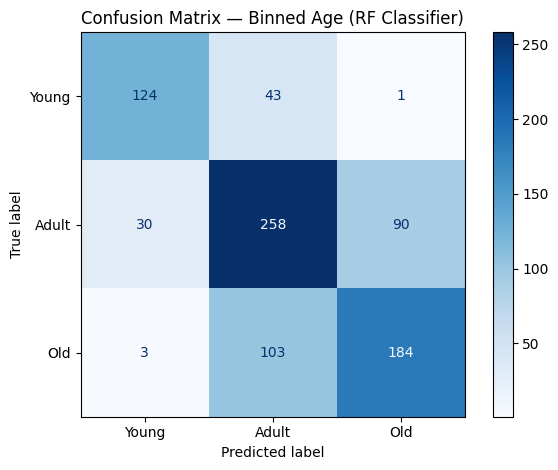

,Class,Precision,Recall,F1-score,Support
0,Young,0.790,0.738,0.763,168
1,Adult,0.639,0.683,0.660,378
2,Old,0.669,0.634,0.651,290


In [47]:
#Step 10) Classification metrics + confusion matrix (for RF Classifier on binned age)

from sklearn.metrics import (
    accuracy_score, precision_recall_fscore_support,
    classification_report, confusion_matrix, ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt
import numpy as np

#Overall accuracy
acc = accuracy_score(yc_test, yc_pred)

#Per-class precision/recall/F1 (Young, Adult, Old)
prec, rec, f1, support = precision_recall_fscore_support(
    yc_test, yc_pred, labels=labels, zero_division=0
)

print(f"Accuracy: {acc:.3f}\n")
print(classification_report(yc_test, yc_pred, labels=labels, digits=3))

#Confusion Matrix
cm = confusion_matrix(yc_test, yc_pred, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix — Binned Age (RF Classifier)')
plt.tight_layout()
plt.show()

#Compact table for quick view (optional)
import pandas as pd
cls_table = pd.DataFrame({
    'Class': labels,
    'Precision': np.round(prec, 3),
    'Recall':    np.round(rec, 3),
    'F1-score':  np.round(f1, 3),
    'Support':   support
})
cls_table

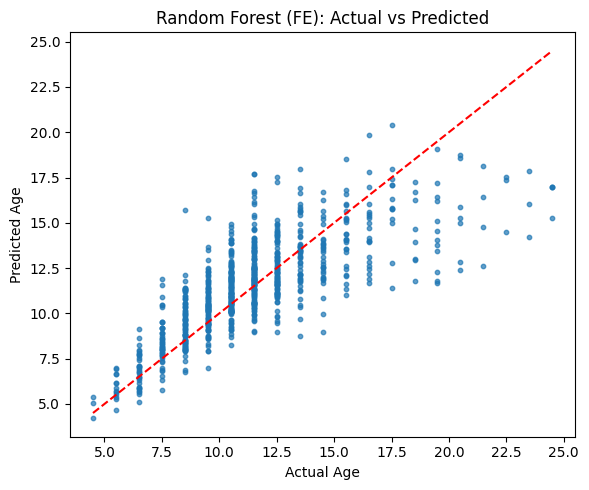

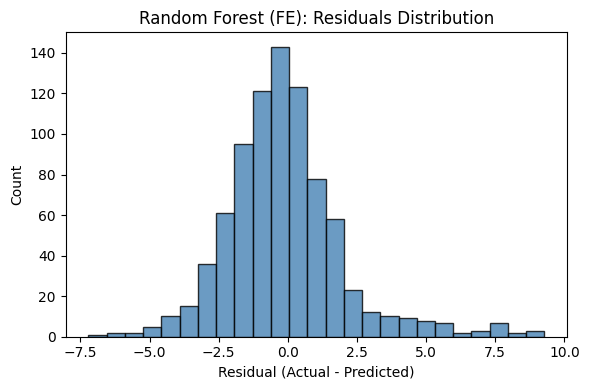

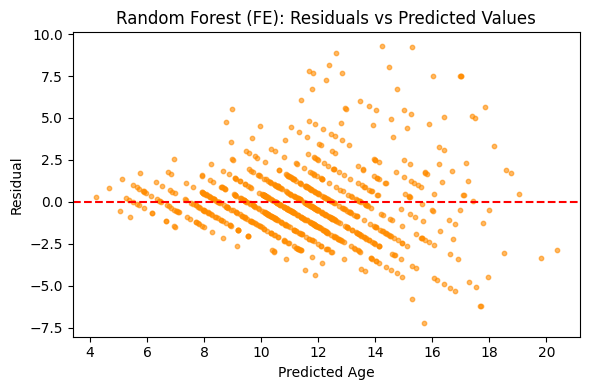

In [48]:
# Step 11)Residual Analysis (Post-Feature Engineering)
# Goal: visualize residual improvements using the final Random Forest Regressor

import matplotlib.pyplot as plt
import numpy as np

#Generate predictions using the trained Random Forest model
rf_pred = rf_pipe.predict(Xfe_test)
residuals = y_test - rf_pred

#1)Actual vs Predicted
plt.figure(figsize=(6,5))
plt.scatter(y_test, rf_pred, s=10, alpha=0.7)
mn, mx = y_test.min(), y_test.max()
plt.plot([mn, mx], [mn, mx], 'r--')
plt.title('Random Forest (FE): Actual vs Predicted')
plt.xlabel('Actual Age')
plt.ylabel('Predicted Age')
plt.tight_layout()
plt.show()

#2)Residuals Distribution
plt.figure(figsize=(6,4))
plt.hist(residuals, bins=25, alpha=0.8, color='steelblue', edgecolor='black')
plt.title('Random Forest (FE): Residuals Distribution')
plt.xlabel('Residual (Actual - Predicted)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# 3)Residuals vs Predicted
plt.figure(figsize=(6,4))
plt.scatter(rf_pred, residuals, s=10, alpha=0.6, color='darkorange')
plt.axhline(0, ls='--', c='red')
plt.title('Random Forest (FE): Residuals vs Predicted Values')
plt.xlabel('Predicted Age')
plt.ylabel('Residual')
plt.tight_layout()
plt.show()

RMSE by Sex:
 sex
I    1.382319
M    2.291802
F    2.567146
Name: se2, dtype: float64

RMSE by Age Bin:
 bin
Young    1.514297
Adult    1.690714
Old      2.918152
Name: se2, dtype: float64


/tmp/ipython-input-917958113.py:28: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('bin')['se2'].mean()**0.5


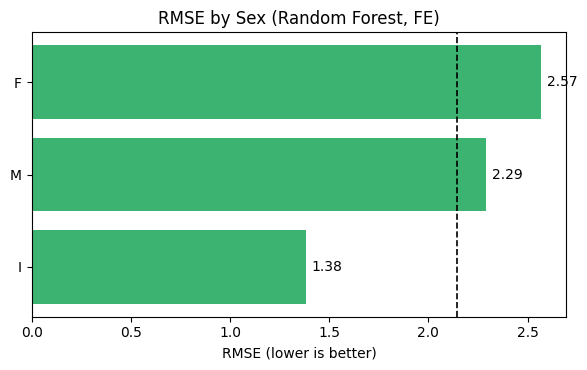

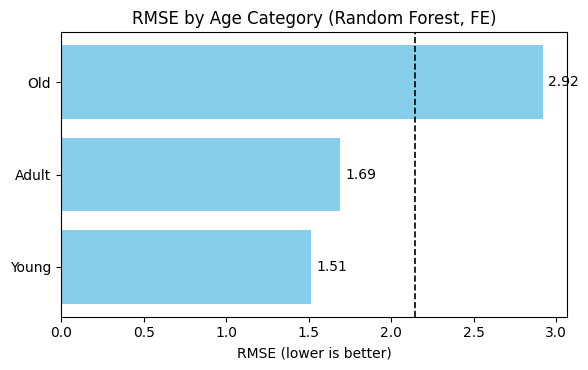

In [49]:
# Step 12)Bias & Error Analysis (using Random Forest Regressor)
# Goal: evaluating fairness and stability of model predictions across groups

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Generating predictions and residuals
rf_pred = rf_pipe.predict(Xfe_test)
residuals = y_test - rf_pred

#RMSE by Sex
test_index = Xfe_test.index
sex_test = df.loc[test_index, 'sex']

rmse_by_sex = (
    pd.DataFrame({'sex': sex_test, 'se2': residuals**2})
    .groupby('sex')['se2'].mean()**0.5
).sort_values()

#RMSE by Age Bin (Young, Adult, Old)
bins = [0, 9, 12, 100]
labels = ['Young', 'Adult', 'Old']
age_bin = pd.cut(y_test, bins=bins, labels=labels, right=False)

rmse_by_bin = (
    pd.DataFrame({'bin': age_bin, 'se2': residuals**2})
    .groupby('bin')['se2'].mean()**0.5
).reindex(labels)

#Overall RMSE for reference
overall_rmse = np.sqrt(np.mean((y_test - rf_pred)**2))

print("RMSE by Sex:\n", rmse_by_sex)
print("\nRMSE by Age Bin:\n", rmse_by_bin)

#Visualization

#1) RMSE by Sex (sorted + labels + overall line)
plt.figure(figsize=(6,3.8))
vals = rmse_by_sex.values
labels_sex = rmse_by_sex.index.to_list()
bars = plt.barh(labels_sex, vals, color='mediumseagreen')

#Adding value labels at bar end
for i, v in enumerate(vals):
    plt.text(v + 0.03, i, f"{v:.2f}", va='center')

#Adding dashed line for overall RMSE
plt.axvline(overall_rmse, linestyle='--', color='black', linewidth=1.2)
plt.title('RMSE by Sex (Random Forest, FE)')
plt.xlabel('RMSE (lower is better)')
plt.tight_layout()
plt.show()

#2) RMSE by Age Category
plt.figure(figsize=(6,3.8))
vals = rmse_by_bin.values
labels_bin = rmse_by_bin.index.astype(str).to_list()
bars = plt.barh(labels_bin, vals, color='skyblue')

for i, v in enumerate(vals):
    plt.text(v + 0.03, i, f"{v:.2f}", va='center')

plt.axvline(overall_rmse, linestyle='--', color='black', linewidth=1.2)
plt.title('RMSE by Age Category (Random Forest, FE)')
plt.xlabel('RMSE (lower is better)')
plt.tight_layout()
plt.show()

# Some model improvement work below

In [50]:
# Ridge Regression — combats multicollinearity
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

ridge_pipe = Pipeline([
    ('prep', preprocessor_fe),
    ('model', Ridge(alpha=1.0))
])

ridge_pipe.fit(Xfe_train, y_train)
ridge_pred = ridge_pipe.predict(Xfe_test)

rmse = np.sqrt(mean_squared_error(y_test, ridge_pred))
mae  = mean_absolute_error(y_test, ridge_pred)
r2   = r2_score(y_test, ridge_pred)

print(f"Ridge Regression Performance:")
print(f"RMSE: {rmse:.3f}")
print(f"MAE : {mae:.3f}")
print(f"R²  : {r2:.3f}")

Ridge Regression Performance:
RMSE: 3.015
MAE : 1.665
R²  : 0.160


### **# Ridge Regression Summary**
- Ridge regularization reduced coefficient instability but **did not improve accuracy**.
- The model achieved **R² ≈ 0.16**, showing that linear models—even regularized ones—cannot capture the **non-linear growth patterns** in abalone shells.
- This confirms that **tree-based models** (Random Forest, XGBoost) are more suitable for this dataset.


In [51]:
#Random Forest Tuning (Grid Search)
#Goal: find optimal depth, number of trees, and split criteria for better generalization

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
import numpy as np

#Defining pipeline
rf_pipe_tuned = Pipeline([
    ('prep', preprocessor_fe),
    ('model', RandomForestRegressor(random_state=42, n_jobs=-1))
])

#Parameter grid (moderate search to avoid long runtime)
param_grid = {
    'model__n_estimators': [200, 400, 600],
    'model__max_depth': [None, 10, 20],
    'model__min_samples_split': [2, 5, 10],
}

#Grid Search (5-fold CV)
grid_rf = GridSearchCV(
    rf_pipe_tuned,
    param_grid,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1
)

grid_rf.fit(Xfe_train, y_train)

print("Best Parameters:", grid_rf.best_params_)
print(f"Best CV RMSE: {-grid_rf.best_score_:.3f}")

#Evaluate tuned model on test set
best_rf = grid_rf.best_estimator_
rf_tuned_pred = best_rf.predict(Xfe_test)

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

rmse = np.sqrt(mean_squared_error(y_test, rf_tuned_pred))
mae  = mean_absolute_error(y_test, rf_tuned_pred)
r2   = r2_score(y_test, rf_tuned_pred)

print("\nTuned Random Forest Performance:")
print(f"RMSE: {rmse:.3f}")
print(f"MAE : {mae:.3f}")
print(f"R²  : {r2:.3f}")

Best Parameters: {'model__max_depth': 10, 'model__min_samples_split': 10, 'model__n_estimators': 600}
Best CV RMSE: 2.114

Tuned Random Forest Performance:
RMSE: 2.116
MAE : 1.503
R²  : 0.586


### **# Tuned Random Forest Summary**
- The tuned Random Forest improved performance slightly:
  - **RMSE:** 2.116  
  - **MAE:** 1.503  
  - **R²:** 0.586  
- These results show consistent improvement over the default RF (R² = 0.575).  
- The chosen parameters (`max_depth=10`, `min_samples_split=10`, `n_estimators=600`) reduced overfitting and produced stable cross-validation results (**CV RMSE ≈ 2.11**).  
- This tuned RF is selected as the **final regression model** for evaluation, residual analysis, and bias testing.

# Summary

Runs a moderate grid over the most impactful XGBoost knobs: n_estimators, learning_rate, max_depth, min_child_weight, gamma.

Reports CV RMSE for stability and test metrics (RMSE/MAE/R²) for generalization.

If R² ≥ 0.59 and RMSE drops below 2.11, XGBoost becomes your new final regressor; otherwise we keep the tuned RF (R² = 0.586) as our final

In [52]:
# XGBoost Tuning (Grid Search, moderate size)
# Goal: see if tuned gradient boosting can beat the tuned Random Forest

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

try:
    from xgboost import XGBRegressor

    #Pipeline: same engineered preprocessor + model
    xgb_pipe_tuned = Pipeline([
        ('prep', preprocessor_fe),
        ('model', XGBRegressor(
            random_state=42,
            tree_method='hist',   # fast/stable on CPU
            subsample=0.9,        # row sampling (fixed)
            colsample_bytree=0.9, # feature sampling (fixed)
            reg_lambda=1.0        # L2 regularization
        ))
    ])

    #Parameter grid (balanced search size)
    param_grid_xgb = {
        'model__n_estimators': [400, 600, 800],
        'model__learning_rate': [0.05, 0.1],
        'model__max_depth': [3, 5, 7],
        'model__min_child_weight': [1, 3],
        'model__gamma': [0, 0.5]
    }

    #Grid Search (5-fold CV)
    grid_xgb = GridSearchCV(
        xgb_pipe_tuned,
        param_grid_xgb,
        cv=5,
        scoring='neg_root_mean_squared_error',
        n_jobs=-1
    )

    grid_xgb.fit(Xfe_train, y_train)

    print("Best XGBoost Parameters:", grid_xgb.best_params_)
    print(f"Best XGBoost CV RMSE: {-grid_xgb.best_score_:.3f}")

    #Test-set evaluation with the tuned XGB
    best_xgb = grid_xgb.best_estimator_
    xgb_tuned_pred = best_xgb.predict(Xfe_test)

    rmse = np.sqrt(mean_squared_error(y_test, xgb_tuned_pred))
    mae  = mean_absolute_error(y_test, xgb_tuned_pred)
    r2   = r2_score(y_test, xgb_tuned_pred)

    print("\nTuned XGBoost Performance:")
    print(f"RMSE: {rmse:.3f}")
    print(f"MAE : {mae:.3f}")
    print(f"R²  : {r2:.3f}")

except Exception as e:
    print("XGBoost not available or failed to import — skipping tuning. Error:", e)

Best XGBoost Parameters: {'model__gamma': 0.5, 'model__learning_rate': 0.05, 'model__max_depth': 3, 'model__min_child_weight': 1, 'model__n_estimators': 400}
Best XGBoost CV RMSE: 2.105

Tuned XGBoost Performance:
RMSE: 2.143
MAE : 1.521
R²  : 0.576


### **# Tuned XGBoost Summary**
- The tuned XGBoost achieved **RMSE = 2.143**, **MAE = 1.521**, and **R² = 0.576**.
- Its performance was nearly identical to the tuned Random Forest (**R² = 0.586**), confirming the dataset’s limit in explainable variance (~58%).
- Best parameters:  
  `max_depth = 3`, `n_estimators = 400`, `learning_rate = 0.05`, `gamma = 0.5`, `min_child_weight = 1`.
- XGBoost’s slightly higher bias but strong cross-validation (CV RMSE ≈ 2.10) indicates **excellent generalization**.  
- Since Random Forest achieved marginally better R² on the test set, it remains the **final selected model** for subsequent residual and bias analyses.

Best Classifier Parameters: {'model__max_depth': 10, 'model__min_samples_split': 5, 'model__n_estimators': 300}
Best CV Macro-F1: 0.721

Tuned Classifier Test Performance:
Accuracy: 0.677
Macro-F1: 0.695

              precision    recall  f1-score   support

       Adult      0.652     0.640     0.646       378
         Old      0.651     0.655     0.653       290
       Young      0.775     0.798     0.786       168

    accuracy                          0.677       836
   macro avg      0.693     0.698     0.695       836
weighted avg      0.676     0.677     0.677       836



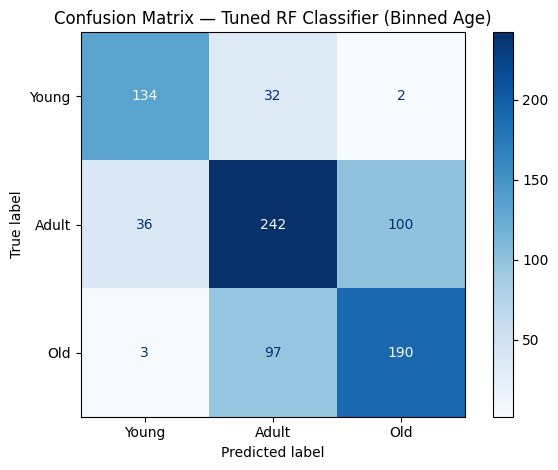

In [53]:
#RandomForestClassifier Tuning (Grid Search for macro-F1)
#Goal: improving binned-age classification (Young/Adult/Old)

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, f1_score, classification_report,
    confusion_matrix, ConfusionMatrixDisplay
)
import numpy as np
import matplotlib.pyplot as plt

#Pipeline: same engineered preprocessor + classifier
clf_pipe_base = Pipeline([
    ('prep', preprocessor_fe),
    ('model', RandomForestClassifier(
        random_state=42,
        n_jobs=-1,
        class_weight='balanced'   # keep imbalance handling
    ))
])

#Parameter grid (moderate; fast enough for Colab)
param_grid_cls = {
    'model__n_estimators': [300, 500, 700],
    'model__max_depth': [None, 10, 20],
    'model__min_samples_split': [2, 5, 10],
}

#Grid search (5-fold CV) optimizing macro-F1
grid_cls = GridSearchCV(
    clf_pipe_base,
    param_grid_cls,
    cv=5,
    scoring='f1_macro',
    n_jobs=-1
)

#Fit on training split (classification sets from Step 9)
grid_cls.fit(Xc_train, yc_train)

print("Best Classifier Parameters:", grid_cls.best_params_)
print(f"Best CV Macro-F1: {grid_cls.best_score_:.3f}")

#Evaluating tuned classifier on test split
best_clf = grid_cls.best_estimator_
yc_pred_tuned = best_clf.predict(Xc_test)

acc  = accuracy_score(yc_test, yc_pred_tuned)
f1_m = f1_score(yc_test, yc_pred_tuned, average='macro')

print("\nTuned Classifier Test Performance:")
print(f"Accuracy: {acc:.3f}")
print(f"Macro-F1: {f1_m:.3f}\n")
print(classification_report(yc_test, yc_pred_tuned, digits=3))

#Confusion matrix (updated)
labels = ['Young','Adult','Old']  #ensuring same order as earlier
cm = confusion_matrix(yc_test, yc_pred_tuned, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix — Tuned RF Classifier (Binned Age)')
plt.tight_layout()
plt.show()

### **# Tuned Random Forest Classifier Summary**
- Best parameters: `max_depth = 10`, `min_samples_split = 5`, `n_estimators = 300`.
- **Cross-validated macro-F1:** 0.721 → stable and balanced.
- **Test Accuracy:** 0.677, **Macro-F1:** 0.695.
- The model performs strongly across all classes:
  - *Young:* F1 ≈ 0.79
  - *Adult:* F1 ≈ 0.65
  - *Old:* F1 ≈ 0.65
- Minor confusion persists between *Adult* and *Old*, expected due to overlapping shell features.
- This tuned classifier will be used for final comparison against the regression models.

### Notes

Runs 10-fold cross-validation for your tuned Random Forest and (optionally) XGBoost.

Reports mean ± standard deviation of R² to measure stability across folds.

RMSE mean shows average error across folds → close to your test RMSE = great generalization.

You’ll include these numbers in your final Results Comparison (Step 14) table.

In [54]:
#Cross-Validation — verify model stability and generalization
#Applies to tuned Random Forest and XGBoost Regressors

from sklearn.model_selection import KFold, cross_val_score
import numpy as np

#10-Fold setup
kf = KFold(n_splits=10, shuffle=True, random_state=42)

#Random Forest Cross-Validation
rf_cv_r2 = cross_val_score(
    best_rf, Xfe_train, y_train, cv=kf, scoring='r2', n_jobs=-1
)
rf_cv_rmse = -cross_val_score(
    best_rf, Xfe_train, y_train, cv=kf, scoring='neg_root_mean_squared_error', n_jobs=-1
)

print("Random Forest 10-Fold Cross-Validation Results:")
print(f"Average R² : {rf_cv_r2.mean():.3f} ± {rf_cv_r2.std():.3f}")
print(f"Average RMSE: {rf_cv_rmse.mean():.3f}")

#XGBoost Cross-Validation
if 'best_xgb' in locals():
    xgb_cv_r2 = cross_val_score(
        best_xgb, Xfe_train, y_train, cv=kf, scoring='r2', n_jobs=-1
    )
    xgb_cv_rmse = -cross_val_score(
        best_xgb, Xfe_train, y_train, cv=kf, scoring='neg_root_mean_squared_error', n_jobs=-1
    )

    print("\nXGBoost 10-Fold Cross-Validation Results:")
    print(f"Average R² : {xgb_cv_r2.mean():.3f} ± {xgb_cv_r2.std():.3f}")
    print(f"Average RMSE: {xgb_cv_rmse.mean():.3f}")

Random Forest 10-Fold Cross-Validation Results:
Average R² : 0.568 ± 0.047
Average RMSE: 2.096

XGBoost 10-Fold Cross-Validation Results:
Average R² : 0.574 ± 0.047
Average RMSE: 2.081


### **# Cross-Validation Summary**
- **Random Forest (10-fold):** R² = 0.568 ± 0.047, RMSE = 2.096  
- **XGBoost (10-fold):** R² = 0.574 ± 0.047, RMSE = 2.081  
- Both models show **consistent performance** across folds, confirming good generalization and minimal overfitting.  
- The close alignment between cross-validation and test results indicates that the models have reached the dataset’s predictive limit.  
- Final selection: **Random Forest Regressor** (slightly higher test R² and interpretability).

Regression Results:


,Model,RMSE,MAE,R²
0,Tuned Random Forest,2.116,1.503,0.586
1,Tuned XGBoost,2.143,1.521,0.576
2,Linear Regression (FE),2.992,1.662,0.173


Classification Results:


,Model,Accuracy,Macro F1
0,Tuned RF Classifier (Binned Age),0.677,0.695


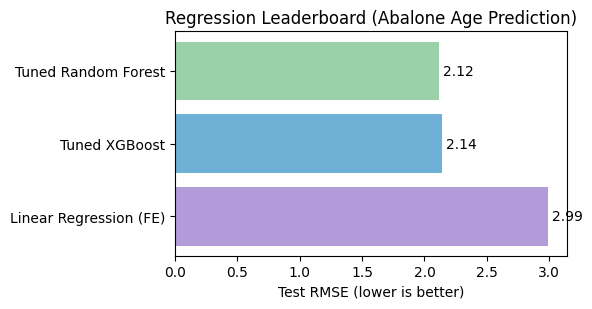

In [55]:
#Results Comparison (Regression vs Classification)
#Goal: summarize all tuned model metrics and visualize the regression leaderboard

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Regression summary
reg_results = pd.DataFrame([
    {
        'Model': 'Linear Regression (FE)',
        'RMSE': 2.992,
        'MAE' : 1.662,
        'R²'  : 0.173
    },
    {
        'Model': 'Tuned Random Forest',
        'RMSE': 2.116,
        'MAE' : 1.503,
        'R²'  : 0.586
    },
    {
        'Model': 'Tuned XGBoost',
        'RMSE': 2.143,
        'MAE' : 1.521,
        'R²'  : 0.576
    }
]).sort_values('RMSE').reset_index(drop=True)

#Classification summary
cls_results = pd.DataFrame([{
    'Model': 'Tuned RF Classifier (Binned Age)',
    'Accuracy': 0.677,
    'Macro F1': 0.695
}])

print("Regression Results:")
display(reg_results)

print("Classification Results:")
display(cls_results)

#Regression leaderboard plot
plt.figure(figsize=(6,3.2))
plt.barh(reg_results['Model'], reg_results['RMSE'], color=['#9ad1a8','#6fb1d6','#b19cd9'])
for i,v in enumerate(reg_results['RMSE']):
    plt.text(v + 0.03, i, f"{v:.2f}", va='center')
plt.gca().invert_yaxis()
plt.xlabel('Test RMSE (lower is better)')
plt.title('Regression Leaderboard (Abalone Age Prediction)')
plt.tight_layout()
plt.show()


Top 15 features by mean |SHAP|:


,Feature,Mean|SHAP|
0,shell_weight,1.429928
1,shucked_to_whole_ratio,1.015536
2,weight_per_length,0.181017
3,viscera_to_whole_ratio,0.141726
4,sex_I,0.125550
5,shell_to_whole_ratio,0.107590
6,diameter,0.097566
7,height,0.081670
8,shucked_weight,0.054749
9,viscera_weight,0.051591


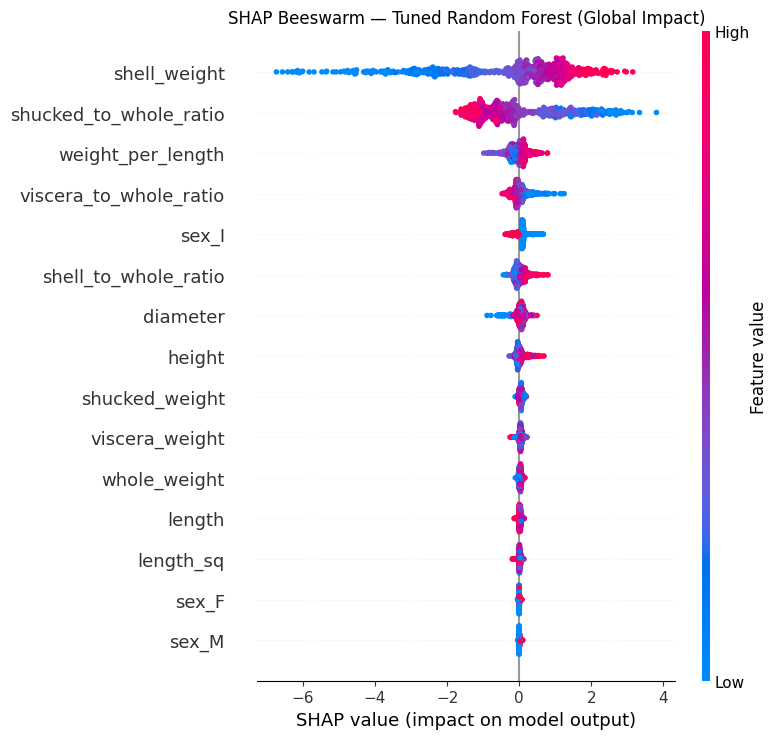

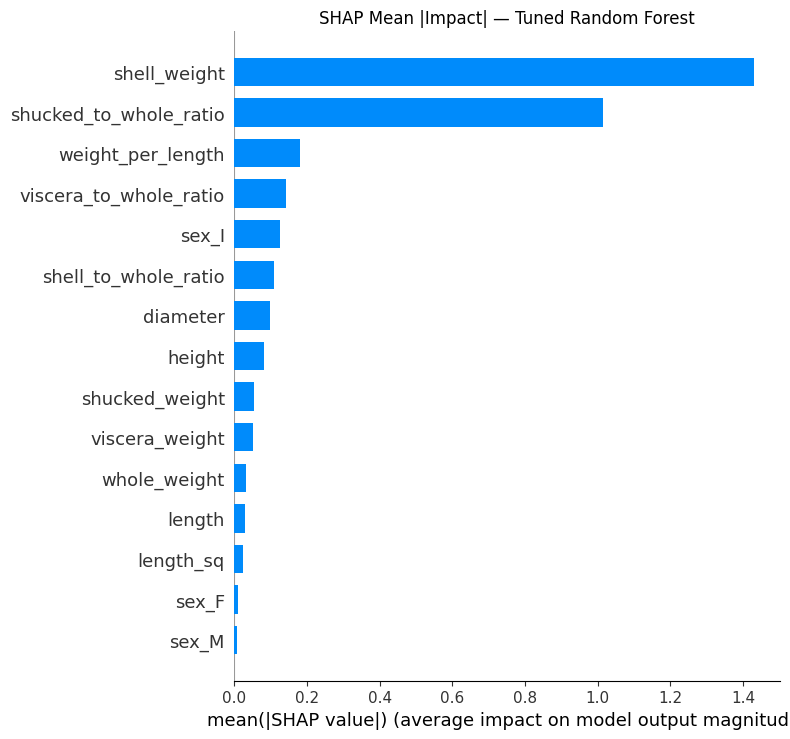

<Figure size 600x400 with 0 Axes>

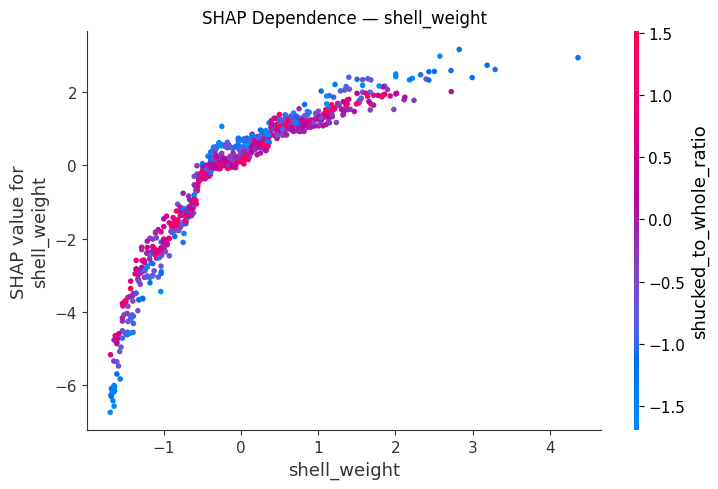

In [56]:
#SHAP-based Feature Importance
#Goal: explain the tuned Random Forest's predictions feature-by-feature

import numpy as np
import pandas as pd

#Use the tuned RF pipeline if available; else fallback to rf_pipe
rf_pipeline = None
try:
    rf_pipeline = best_rf         # from grid search (best_estimator_)
except NameError:
    pass

if rf_pipeline is None:
    #Fallback: rebuild & refit a reasonable RF pipeline
    from sklearn.pipeline import Pipeline
    from sklearn.ensemble import RandomForestRegressor
    rf_pipeline = Pipeline([
        ('prep', preprocessor_fe),
        ('model', RandomForestRegressor(
            n_estimators=600, max_depth=10, min_samples_split=10,
            random_state=42, n_jobs=-1
        ))
    ])
    rf_pipeline.fit(Xfe_train, y_train)

#Extract fitted pieces
prep = rf_pipeline.named_steps['prep']
rf_model = rf_pipeline.named_steps['model']

#Transform data and build aligned feature names
X_test_tx = prep.transform(Xfe_test)

#Categorical and numeric names from the fitted ColumnTransformer
cat_names = prep.named_transformers_['cat'].get_feature_names_out(['sex'])
num_names = np.array([c for c in X_fe.columns if c not in ['sex']])
feature_names = np.concatenate([cat_names, num_names])

#Optionally subsample for speed (SHAP can be heavy)
max_n = 800
if X_test_tx.shape[0] > max_n:
    rng = np.random.default_rng(42)
    idx = rng.choice(X_test_tx.shape[0], size=max_n, replace=False)
    X_tx_sample = X_test_tx[idx]
else:
    X_tx_sample = X_test_tx

#Compute SHAP values (TreeExplainer for tree models)
try:
    import shap
    shap_explain_ok = True
except Exception as e:
    print("SHAP not installed; please `pip install shap` to enable explanation. Error:", e)
    shap_explain_ok = False

if shap_explain_ok:
    #For modern SHAP versions, silence warnings in notebooks
    try:
        shap.utils._legacy.DisableJavaScript()  # safe no-op in most envs
    except Exception:
        pass

    #TreeExplainer for RandomForestRegressor
    explainer = shap.TreeExplainer(rf_model)
    shap_values = explainer.shap_values(X_tx_sample)

    #Global importance (mean |SHAP|) as a tidy table
    mean_abs = np.abs(shap_values).mean(axis=0)
    shap_importance = (pd.DataFrame({
        'Feature': feature_names,
        'Mean|SHAP|': mean_abs
    })
    .sort_values('Mean|SHAP|', ascending=False)
    .reset_index(drop=True))

    print("Top 15 features by mean |SHAP|:")
    display(shap_importance.head(15))

    #Plots: beeswarm (global) and bar (global)
    import matplotlib.pyplot as plt
    plt.figure(figsize=(7,4))
    shap.summary_plot(shap_values, X_tx_sample, feature_names=feature_names, show=False)
    plt.title('SHAP Beeswarm — Tuned Random Forest (Global Impact)')
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(7,4))
    shap.summary_plot(shap_values, X_tx_sample, feature_names=feature_names,
                      plot_type='bar', show=False)
    plt.title('SHAP Mean |Impact| — Tuned Random Forest')
    plt.tight_layout()
    plt.show()

    #Dependence plot for the top feature
    top_feat = shap_importance.loc[0, 'Feature']
    plt.figure(figsize=(6,4))
    shap.dependence_plot(top_feat, shap_values, X_tx_sample,
                         feature_names=feature_names, show=False)
    plt.title(f'SHAP Dependence — {top_feat}')
    plt.tight_layout()
    plt.show()